## Extracting Tracking Confidence

Range of pixels selected for each digit of the tracking confidence in each cine frame. These compared to reference pixels using skimage's structural similarity coefficient to find value of each digit

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
%matplotlib notebook

import pickle

import skimage

from skimage.util import img_as_float

from skimage.metrics import structural_similarity as ssim

import time

<IPython.core.display.Javascript object>


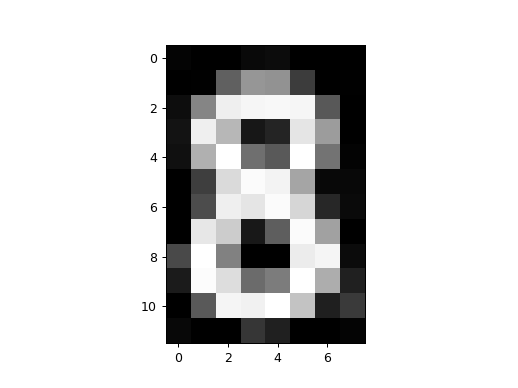

In [2]:
### Reference numbers

refs = [0,0,0,0,0,0,0,0,0,0]


# for 0

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 82 )

ref_0 = cine_image[4:16, 156:164][:,:,0]

refs[0] = ref_0


# for 1

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 23 )

ref_1 = cine_image[4:16, 156:164][:,:,0]

refs[1] = ref_1


# for 2


cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 424 )

ref_2 = cine_image[4:16, 156:164][:,:,0]

refs[2] = ref_2


# for 3



cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 1531 )

ref_3 = cine_image[4:16, 156:164][:,:,0]

refs[3] = ref_3



#for 4


cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 1060 )

ref_4 = cine_image[4:16, 156:164][:,:,0]

refs[4] = ref_4


# for 5


cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 18 )

ref_5 = cine_image[4:16, 149:157][:,:,0]

refs[5] = ref_5




# for 6

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 23 )

ref_6 = cine_image[4:16, 149:157][:,:,0]

refs[6] = ref_6


# for 7

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 143 )

ref_7 = cine_image[4:16, 156:164][:,:,0]

refs[7] = ref_7


# for 8



cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv'+ '/frame-%04d.png' % 19 )

ref_8 = cine_image[4:16, 156:164][:,:,0]

refs[8] = ref_8



# for 9



cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 18 )

ref_9 = cine_image[4:16, 156:164][:,:,0]

refs[9] = ref_9




plt.figure()

plt.imshow(ref_8, cmap = 'gray')

In [3]:
with open('Cine Pickles/patient_numbers.pickle', 'rb') as handle:
    pat_nums = pickle.load(handle)
    
with open('Cine Pickles/pat_num_2_frac_nums.pickle', 'rb') as handle:
    pat_num_2_frac_nums = pickle.load(handle)
    

In [4]:
for pat_num in [10]:#pat_nums:

    for frac_num in [5]:#range(1, pat_num_2_frac_nums[pat_num] + 1):
        
        

        print( '------>' + str(pat_num) + ' , ' + str(frac_num))


        
        cine_video_name = 'pat_' + str(pat_num) + '_frac_' + str(frac_num) + '.ogv'


# for number in [4]:
    
#     cine_video_name = 'phantom ' + str(number) + '.ogv'        
        
#     print(cine_video_name)


        with open('Cine Pickles/' + cine_video_name + '/frame_nums.pickle', 'rb') as handle:
            frame_nums = pickle.load(handle)



        confidences = []


        for frame_index in frame_nums:

            #frame_index = 998

            cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_index )


            tracking_number_1 = cine_image[4:16, 149:157][:,:,0]


            tracking_number_2 = cine_image[4:16, 156:164][:,:,0]


            tracking_number_3 = cine_image[4:16, 170:178][:,:,0]


            sims_1 = []

            sims_2 = []

            sims_3 = []



            for number in range(0,10):

                ref_num = refs[number]

                sims_1.append( ssim( tracking_number_1, (ref_num) ))

                sims_2.append( ssim( tracking_number_2, (ref_num) ))

                sims_3.append( ssim( tracking_number_3, (ref_num) ))


            number_1 =  np.where(  np.array(sims_1) ==  max(sims_1) )[0][0]

            number_2 =  np.where(  np.array(sims_2) ==  max(sims_2) )[0][0]

            number_3 =  np.where(  np.array(sims_3) ==  max(sims_3) )[0][0]


            confidence = 10*number_1 + number_2 + 0.1*number_3


            confidences.append(confidence)









        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'rb') as handle:
            breath_hold_frames_split = pickle.load(handle)


        # breath_hold_frames = []

        # for i in range(0, len(breath_hold_frames_split)):

        #     breath_hold_frames += list(breath_hold_frames_split[i])


        breath_hold_masks = []


        breath_hold_numbers = []


        for breath_hold_number in range(0, len(breath_hold_frames_split)):


            breath_hold_numbers.append(breath_hold_number)



            this_breath_hold_mask = [ frame in breath_hold_frames_split[breath_hold_number] for frame in frame_nums]

            breath_hold_masks.append(this_breath_hold_mask)






        breath_hold_confidences_split = []


        for breath_hold_number in range(0, len(breath_hold_frames_split)):

            this_breath_hold_confidences = np.array(confidences)[breath_hold_masks[breath_hold_number]]


            breath_hold_confidences_split.append(this_breath_hold_confidences)




        with open('Cine Pickles/' + cine_video_name + '/All_Frames_Confidences.pickle', 'wb') as handle:
            pickle.dump(confidences, handle, protocol=pickle.HIGHEST_PROTOCOL)


        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_confidences_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_confidences_split, handle, protocol=pickle.HIGHEST_PROTOCOL)


    #         time.sleep(30)






------>10 , 5


<IPython.core.display.Javascript object>


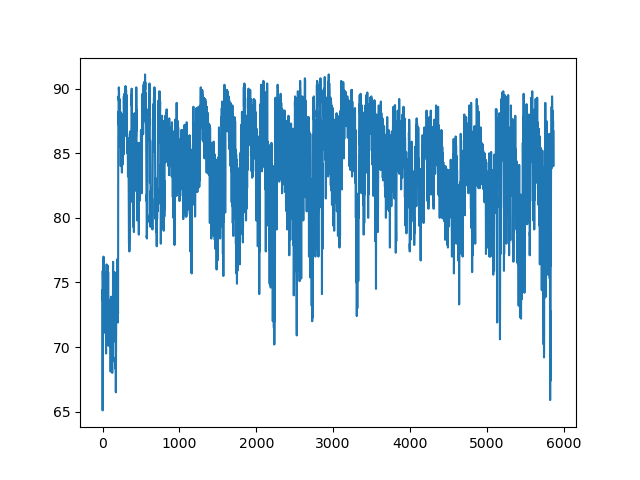

In [10]:
cine_video_name = 'pat_10_frac_4.ogv'

with open('Cine Pickles/' + cine_video_name + '/All_Frames_Confidences.pickle', 'rb') as handle:
    confidences = pickle.load(handle)


plt.figure()

plt.plot(confidences)

In [4]:
cine_video_name = 'test02_cine_frac03.ogv'

cine_video_name = 'ZZZZZ, Modus4D  - Fraction1 - 1.ogv'

In [5]:
with open('Cine Pickles/' + cine_video_name + '/frame_nums.pickle', 'rb') as handle:
    frame_nums = pickle.load(handle)

In [6]:
frame_index = 2759
cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_index )



# cine_image = img_as_float(cine_image)

# cine_original = cine_image


tracking_number_1 = cine_image[4:16, 149:157]


tracking_number_2 = cine_image[4:16, 156:164]


tracking_number_3 = cine_image[4:16, 170:178]


<IPython.core.display.Javascript object>


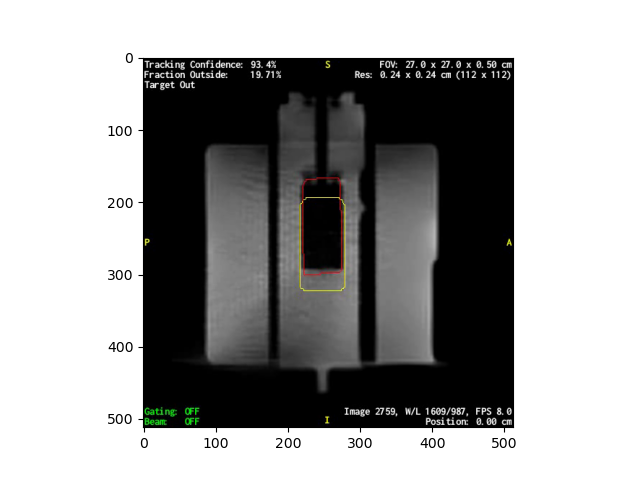

<IPython.core.display.Javascript object>


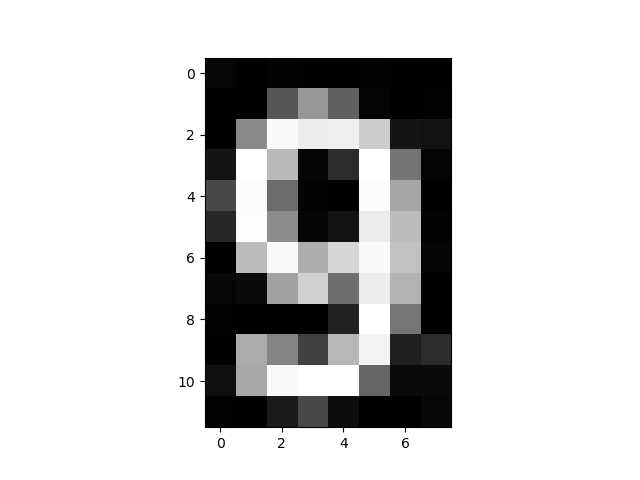

<IPython.core.display.Javascript object>


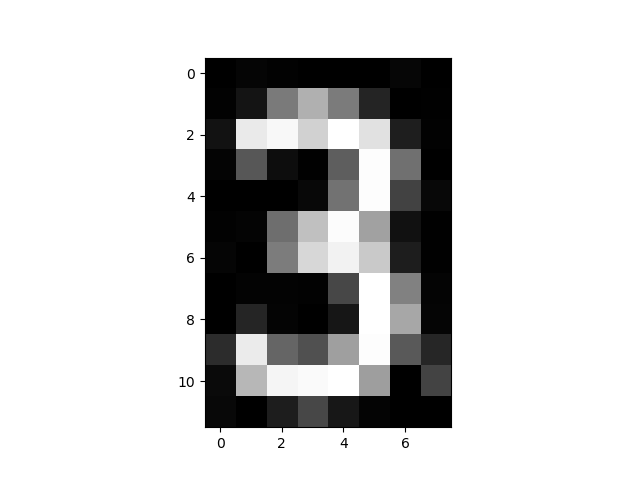

<IPython.core.display.Javascript object>


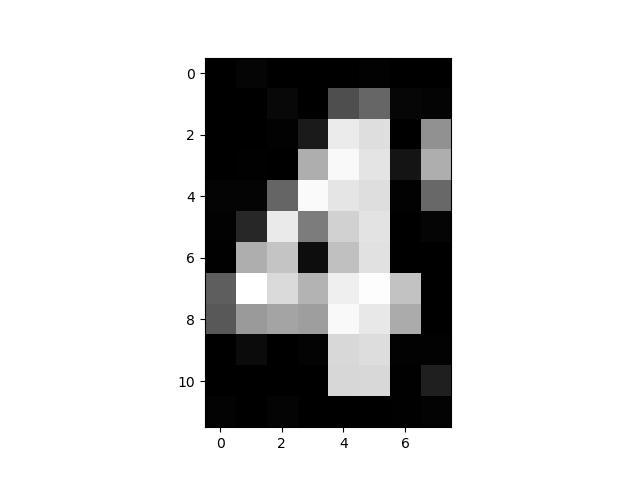

(12, 8, 3)


In [7]:
plt.figure()

plt.imshow(cine_image)


plt.figure()

plt.imshow(tracking_number_1[:,:,0], cmap = 'gray')

plt.figure()

plt.imshow(tracking_number_2)

plt.figure()

plt.imshow(tracking_number_3)

print(tracking_number_1.shape)

<IPython.core.display.Javascript object>


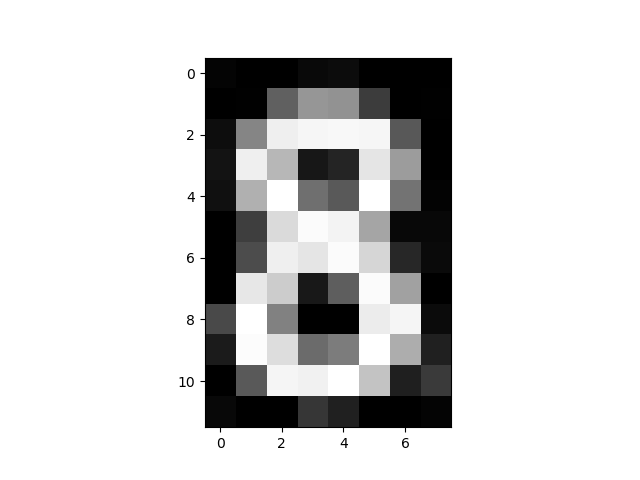

In [8]:
### Reference numbers

refs = [0,0,0,0,0,0,0,0,0,0]


# for 0

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 82 )

ref_0 = cine_image[4:16, 156:164][:,:,0]

refs[0] = ref_0


# for 1

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 23 )

ref_1 = cine_image[4:16, 156:164][:,:,0]

refs[1] = ref_1


# for 2


cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 424 )

ref_2 = cine_image[4:16, 156:164][:,:,0]

refs[2] = ref_2


# for 3



cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 1531 )

ref_3 = cine_image[4:16, 156:164][:,:,0]

refs[3] = ref_3



#for 4


cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 1060 )

ref_4 = cine_image[4:16, 156:164][:,:,0]

refs[4] = ref_4


# for 5


cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 18 )

ref_5 = cine_image[4:16, 149:157][:,:,0]

refs[5] = ref_5




# for 6

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 23 )

ref_6 = cine_image[4:16, 149:157][:,:,0]

refs[6] = ref_6


# for 7

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 143 )

ref_7 = cine_image[4:16, 156:164][:,:,0]

refs[7] = ref_7


# for 8



cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 19 )

ref_8 = cine_image[4:16, 156:164][:,:,0]

refs[8] = ref_8



# for 9



cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 18 )

ref_9 = cine_image[4:16, 156:164][:,:,0]

refs[9] = ref_9




plt.figure()

plt.imshow(ref_8, cmap = 'gray')


#### Comapring to reference numbers


In [9]:


confidences = []


for frame_index in frame_nums:

    #frame_index = 998

    cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_index )


    tracking_number_1 = cine_image[4:16, 149:157][:,:,0]


    tracking_number_2 = cine_image[4:16, 156:164][:,:,0]


    tracking_number_3 = cine_image[4:16, 170:178][:,:,0]




    sims_1 = []

    sims_2 = []

    sims_3 = []



    for number in range(0,10):

        ref_num = refs[number]

        sims_1.append( ssim( tracking_number_1, (ref_num) ))

        sims_2.append( ssim( tracking_number_2, (ref_num) ))

        sims_3.append( ssim( tracking_number_3, (ref_num) ))


    number_1 =  np.where(  np.array(sims_1) ==  max(sims_1) )[0][0]

    number_2 =  np.where(  np.array(sims_2) ==  max(sims_2) )[0][0]

    number_3 =  np.where(  np.array(sims_3) ==  max(sims_3) )[0][0]


    confidence = 10*number_1 + number_2 + 0.1*number_3
    
    
    confidences.append(confidence)

In [10]:
confidences[2759
           ]

93.4

<IPython.core.display.Javascript object>


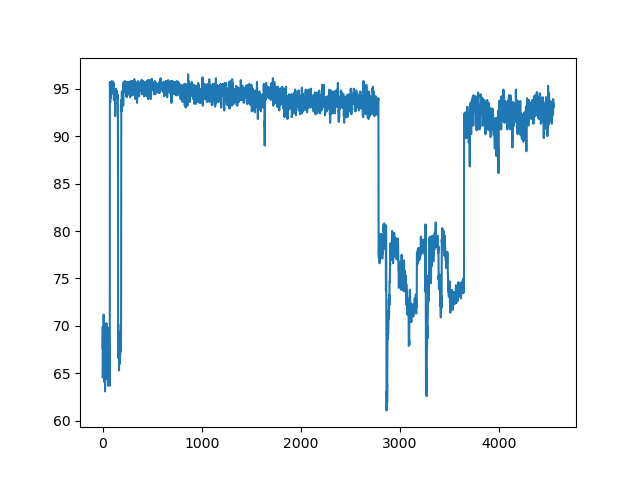

In [11]:
plt.figure()

plt.plot(frame_nums, confidences)

#plt.scatter([7], np.sum(tracking_number_2), color = 'red')

In [135]:
with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'rb') as handle:
    breath_hold_frames_split = pickle.load(handle)
    
    
# breath_hold_frames = []

# for i in range(0, len(breath_hold_frames_split)):
    
#     breath_hold_frames += list(breath_hold_frames_split[i])


breath_hold_masks = []


breath_hold_numbers = []


for breath_hold_number in range(0, len(breath_hold_frames_split)):
    
    
    breath_hold_numbers.append(breath_hold_number)
    
    
    
    this_breath_hold_mask = [ frame in breath_hold_frames_split[breath_hold_number] for frame in frame_nums]
    
    breath_hold_masks.append(this_breath_hold_mask)
    
    
    



breath_hold_confidences_split = []


for breath_hold_number in range(0, len(breath_hold_frames_split)):
    
    this_breath_hold_confidences = np.array(confidences)[breath_hold_masks[breath_hold_number]]
    
    
    breath_hold_confidences_split.append(this_breath_hold_confidences)





In [136]:
len(breath_hold_confidences_split)

18

<IPython.core.display.Javascript object>


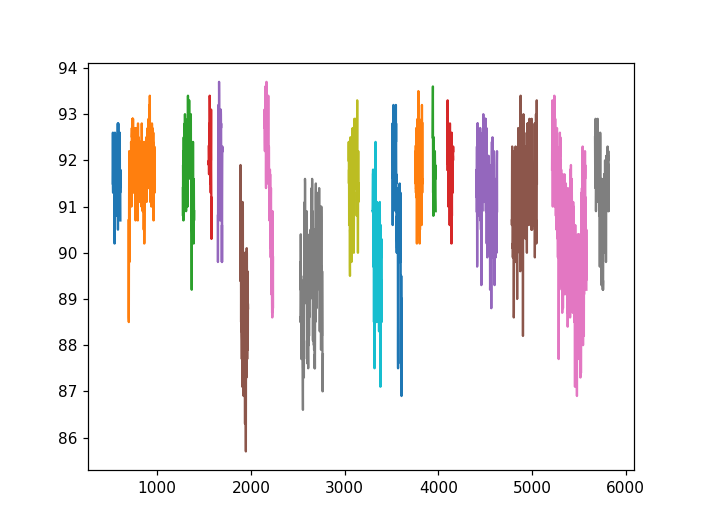

In [137]:
plt.figure()

for breath_hold_number in breath_hold_numbers:

    plt.plot( breath_hold_frames_split[breath_hold_number] , breath_hold_confidences_split[breath_hold_number] )

need to split confidences into induvidual breath holds

In [138]:
with open('Cine Pickles/' + cine_video_name + '/All_Frames_Confidences.pickle', 'wb') as handle:
    pickle.dump(confidences, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_confidences_split.pickle', 'wb') as handle:
    pickle.dump(breath_hold_confidences_split, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [139]:
with open('Cine Pickles/' + cine_video_name + '/All_Frames_Confidences.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [140]:
test[2330]

89.8

In [141]:
### testing rescaling to 144x144

In [142]:
from skimage.transform import rescale, resize, downscale_local_mean

cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.jpg' %988 )


from skimage.util import img_as_float

cine_image = img_as_float(cine_image)


plt.figure()

plt.imshow(cine_image)

cine_144 = rescale(cine_image, (144/512) , anti_aliasing=False, multichannel = 'True')

FileNotFoundError: [Errno 2] No such file or directory: 'Cine frames/test02_cine_frac03.ogv/frame-0988.jpg'

In [ ]:
plt.figure()

plt.imshow(cine_144, cmap =  'gray')